## ML Lab 3
### Neural Networks

In the following exercise class we explore how to design and train neural networks in various ways.

#### Prerequisites:

In order to follow the exercises you need to:
1. Activate your conda environment from last week via: `source activate <env-name>` 
2. Install tensorflow (https://www.tensorflow.org) via: `pip install tensorflow` (CPU-only)
3. Install keras (provides high level wrapper for tensorflow) (https://keras.io) via: `pip install keras`

## Exercise 1: Create a 2 layer network that acts as an XOR gate using numpy.

XOR is a fundamental logic gate that outputs a one whenever there is an odd parity of ones in its input and zero otherwise. For two inputs this can be thought of as an exclusive or operation and the associated boolean function is fully characterized by the following truth table.

| X | Y | XOR(X,Y) |
|---|---|----------|
| 0 | 0 |    0     |
| 0 | 1 |    1     |
| 1 | 0 |    1     |
| 1 | 1 |    0     |

The function of an XOR gate can also be understood as a classification problem on $v \in \{0,1\}^2$ and we can think about designing a classifier acting as an XOR gate. It turns out that this problem is not solvable by any single layer perceptron (https://en.wikipedia.org/wiki/Perceptron) because the set of points $\{(0,0), (0,1), (1,0), (1,1)\}$ is not linearly seperable.

**Design a two layer perceptron using basic numpy matrix operations that implements an XOR Gate on two inputs. Think about the flow of information and accordingly set the weight values by hand.**

### Data

In [2]:
import numpy as np

def generate_xor_data():
    X = [(i,j) for i in [0,1] for j in [0,1]]
    y = [int(np.logical_xor(x[0], x[1])) for x in X]
    return X, y
    
print(generate_xor_data())

([(0, 0), (0, 1), (1, 0), (1, 1)], [0, 1, 1, 0])


### Hints
A single layer in a multilayer perceptron can be described by the equation $y = f(\vec{b} + W\vec{x})$ with $f$ the logistic function, a smooth and differentiable version of the step function, and defined as $f(z) = \frac{1}{1+e^{-z}}$. $\vec{b}$ is the so called bias, a constant offset vector and $W$ is the weight matrix. However, since we set the weights by hand feel free to use hard thresholding instead of using the logistic function. Write down the equation for a two layer MLP and implement it with numpy. For documentation see https://docs.scipy.org/doc/numpy-1.13.0/reference/ 

In [145]:
"""
Implement your solution here.
"""

'\nImplement your solution here.\n'

### Solution

| X | Y | AND(NOT X, Y) | AND(X,NOT Y) | OR[AND(NOT X, Y), AND(X, NOT Y)]| XOR(X,Y) |
|---|---|---------------|--------------|---------------------------------|----------|
| 0 | 0 |    0          |      0       |                 0               |    0     |
| 0 | 1 |    1          |      0       |                 1               |    1     |
| 1 | 0 |    0          |      1       |                 1               |    1     |
| 1 | 1 |    0          |      0       |                 0               |    0     |

Implement XOR as a combination of 2 AND Gates and 1 OR gate where each neuron in the network acts as one of these gates.

In [167]:
"""
Definitions:

Input = np.array([X,Y])

0 if value < 0.5
1 if value >= 0.5
"""

def threshold(vector):
    return (vector>=0.5).astype(float)

def mlp(x, W0, W1, b0, b1, f):
    x0 = f(np.dot(W0, x) + b0)
    x1 = f(np.dot(W1, x0) + b1)
    return x1

# AND(NOT X, Y)
w_andnotxy = np.array([-1.0, 1.0])
# AND(X, NOT Y)
w_andxnoty = np.array([1.0, -1.0])
# W0 weight matrix:
W0 = np.vstack([w_andnotxy, w_andxnoty])

# OR(X,Y)
w_or = np.array([1., 1.])
W1 = w_or

# No biases needed
b0 = np.array([0.0,0.0])
b1 = 0.0

print("Input", "Output", "XOR")
xx,yy = generate_xor_data()
for x,y in zip(xx, yy):
    print(x, int(mlp(x, W0, W1, b0, b1, threshold)),"  ", y)

Input Output XOR
(0, 0) 0    0
(0, 1) 1    1
(1, 0) 1    1
(1, 1) 0    0


## Exercise 2: Use Keras to design, train and evaluate a neural network that can classify points on a 2D plane.

### Data generator

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def generate_spiral_data(n_points, noise=1.0):
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

### Training data

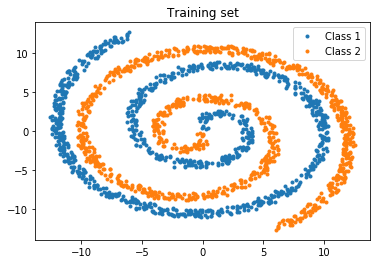

In [151]:
X_train, y_train = generate_spiral_data(1000)

plt.title('Training set')
plt.plot(X_train[y_train==0,0], X_train[y_train==0,1], '.', label='Class 1')
plt.plot(X_train[y_train==1,0], X_train[y_train==1,1], '.', label='Class 2')
plt.legend()
plt.show()

### Test data

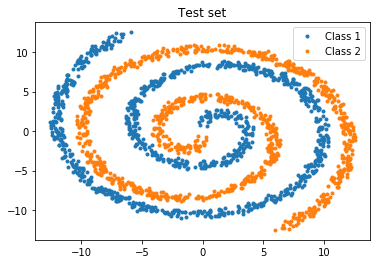

In [152]:
X_test, y_test = generate_spiral_data(1000)

plt.title('Test set')
plt.plot(X_test[y_test==0,0], X_test[y_test==0,1], '.', label='Class 1')
plt.plot(X_test[y_test==1,0], X_test[y_test==1,1], '.', label='Class 2')
plt.legend()
plt.show()

### 2.1. Design and train your model
The current model performs badly, try to find a more advanced architecture that is able to solve the classification problem. Read the following code snippet and understand the involved functions. Vary width and depth of the network and play around with activation functions, loss functions and optimizers to achieve a better result. Read up on parameters and functions for sequential models at https://keras.io/getting-started/sequential-model-guide/.

In [153]:
from keras.models import Sequential
from keras.layers import Dense

"""
Replace the following model with yours and try to achieve better classification performance
"""
bad_model = Sequential()
bad_model.add(Dense(12, input_dim=2, activation='tanh'))
bad_model.add(Dense(1, activation='sigmoid'))

bad_model.compile(loss='mean_squared_error',
                  optimizer='SGD', # SGD = Stochastic Gradient Descent
                  metrics=['accuracy'])

# Train the model
bad_model.fit(X_train, y_train, epochs=150, batch_size=10,  verbose=0)

### Predict

In [154]:
bad_prediction = np.round(bad_model.predict(X_test).T[0])

### Visualize

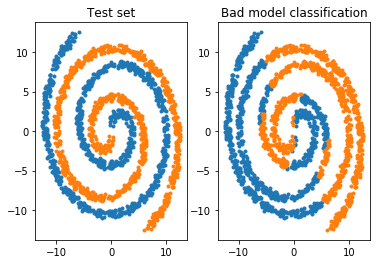

In [158]:
plt.subplot(1,2,1)

plt.title('Test set')
plt.plot(X_test[y_test==0,0], X_test[y_test==0,1], '.')
plt.plot(X_test[y_test==1,0], X_test[y_test==1,1], '.')
plt.subplot(1,2,2)

plt.title('Bad model classification')
plt.plot(X_test[bad_prediction==0,0], X_test[bad_prediction==0,1], '.')
plt.plot(X_test[bad_prediction==1,0], X_test[bad_prediction==1,1], '.')
plt.show()

### 2.2. Visualize the decision boundary of your model.

In [67]:
"""
Implement your solution here.
"""

'\nImplement your solution here.\n'

## Solution

### Model design and training

In [159]:
from keras.layers import Dense, Dropout

good_model = Sequential()
good_model.add(Dense(64, input_dim=2, activation='relu'))
good_model.add(Dense(64, activation='relu'))
good_model.add(Dense(64, activation='relu'))
good_model.add(Dense(1, activation='sigmoid'))

good_model.compile(loss='binary_crossentropy',
                   optimizer='rmsprop',
                   metrics=['accuracy'])

good_model.fit(X_train, y_train, epochs=150, batch_size=10,  verbose=0)

### Prediction

In [160]:
good_prediction = np.round(good_model.predict(X_test).T[0])

### Visualization

#### Performance

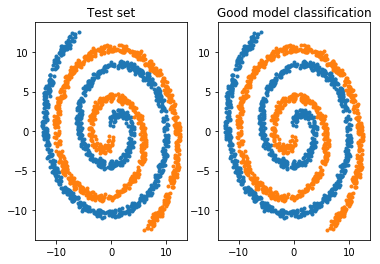

In [163]:
plt.subplot(1,2,1)
plt.title('Test set')
plt.plot(X_test[y_test==0,0], X_test[y_test==0,1], '.')
plt.plot(X_test[y_test==1,0], X_test[y_test==1,1], '.')
plt.subplot(1,2,2)
plt.title('Good model classification')
plt.plot(X_test[good_prediction==0,0], X_test[good_prediction==0,1], '.')
plt.plot(X_test[good_prediction==1,0], X_test[good_prediction==1,1], '.')
plt.show()

#### Decision boundary

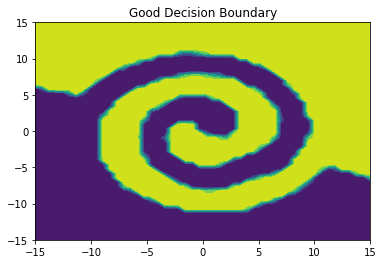

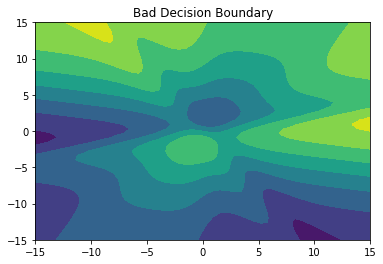

In [164]:
# Generate grid:
line = np.linspace(-15,15)
xx, yy = np.meshgrid(line,line)
grid = np.stack((xx,yy))

# Reshape to fit model input size:
grid = grid.T.reshape(-1,2)

# Predict:
good_prediction = good_model.predict(grid)
bad_prediction = bad_model.predict(grid)

# Reshape to grid for visualization:
plt.title("Good Decision Boundary")
good_prediction = good_prediction.T[0].reshape(len(line),len(line))
plt.contourf(xx,yy,good_prediction)
plt.show()

plt.title("Bad Decision Boundary")
bad_prediction = bad_prediction.T[0].reshape(len(line),len(line))
plt.contourf(xx,yy,bad_prediction)
plt.show()
